In [57]:
'''
Задание 1
Создать функцию, реализующую мультипликативный метод генерации
последовательности случайных чисел со следующими параметрами:
a = 22695477 , b = 1 , m = 2 ** 32
'''
def rand(x0):
    x = (22695477 * x0 + 1) % 2 ** 32
    return x

In [58]:
'''
Задание 2
Сгенерировать с помощью функции, реализующей мультипликативный
метод, равномерно распределенные последовательности случайных чисел в
интервале от A=0 до B=10 длинной N = 10**2, 10**3, 10**4, 10**5  . В качестве начального
значения для генератора использовать X = 1.
'''


def create_seq(max_length):
    seq = []
    x0 = 1
    for i in range(max_length):
        new = rand(x0)
        seq.append(new % 11)
        x0 = new
    return seq


seq2 = create_seq(10 ** 2)
seq3 = create_seq(10 ** 3)
seq4 = create_seq(10 ** 4)
seq5 = create_seq(10 ** 5)

In [60]:
'''
Задание 3
Рассчитать для сгенерированных последовательностей математическое
ожидание и дисперсию. Сравнить полученные значения с математическим
ожиданием и дисперсией теоретической равномерно распределенной
случайной величиной.
'''
import statistics as s

lst_means = []
lst_variances = []

lst_means.append(s.mean(seq2))
lst_means.append(s.mean(seq3))
lst_means.append(s.mean(seq4))
lst_means.append(s.mean(seq5))

lst_variances.append(s.variance(seq2))
lst_variances.append(s.variance(seq3))
lst_variances.append(s.variance(seq4))
lst_variances.append(s.variance(seq5))

print(lst_means, '- Мат. ожидания последовательностей')
print(lst_variances, '- Дисперсия последовательностей')

real_mean = 5
real_variance = 10

lst_mean_diff = []
lst_variances_diff = []

for i in range(4):
    lst_mean_diff.append(abs(real_mean - lst_means[i]))
    lst_variances_diff.append(abs(real_variance - lst_variances[i]))

print(lst_mean_diff, '- Разница между реальным и сгеннерированным мат. ожиданием')
print(lst_variances_diff, '- Разница между реальной и сгеннерированной дисперсией')

'''
Как мы видим, чем больше выборка, тем ближе выборочные статистики к реальным
'''

[4.98, 4.798, 4.9712, 4.99372] - Мат. ожидания последовательностей
[8.646060606060606, 9.72291891891892, 10.03497405740574, 10.031400875608757] - Дисперсия последовательностей
[0.019999999999999574, 0.20199999999999996, 0.02880000000000038, 0.006280000000000285] - Разница между реальным и сгеннерированным мат. ожиданием
[1.3539393939393936, 0.2770810810810804, 0.034974057405740666, 0.031400875608756706] - Разница между реальной и сгеннерированной дисперсией


In [61]:
'''
Задание 4
Определить период сгенерированной последовательности случайных чисел
'''

def seq_period(seq):
    length = len(seq)
    result = []
    for i in range(length):
        for j in range(i, length):
            if seq[i] == seq[j] and i != j:
                result.append(j-i)
                result.append(i)
                result.append(j)
                return result
    result.append(-1)
    result.append(-1)
    result.append(-1)
    return result

print(seq_period(seq2))

[3, 0, 3]


In [67]:
'''
Задание 5
Реализовать функцию определения относительных частот случайных
чисел по известной выборке. Входными параметрами функции должны быть:
выборка случайных чисел, заданные левая и правая граница выборки,
количество участков. Выходным параметром – относительные частоты для
заданных участков.
'''
import math as m

def frequency(seq, a, b, count):
    dy = (b - a) / count
    freq = {}
    for yc in seq:
        fn = int(m.floor(yc / dy))
        if fn not in freq.keys():
            freq[fn] = 1
        else:
            freq[fn] += 1
    for i in range(count + 1):
        freq[i] = freq[i] / (len(seq) * dy)
    return freq

seq2_freq = frequency(seq2, 0, 10, 10)
seq3_freq = frequency(seq3, 0, 10, 10)
seq4_freq = frequency(seq4, 0, 10, 10)
seq5_freq = frequency(seq5, 0, 10, 10)

In [ ]:
'''
Задание 6
Построить гистограммы относительных частот для полученных
последовательностей случайных чисел на 10 участках и рассчитать для них
значение критерия Пирсона.
'''

0.13164503598901098 - Критерий Пирсона


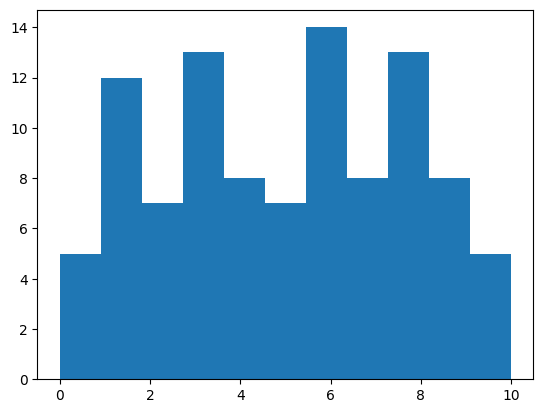

In [71]:
plt.hist(seq2, bins = 11) # распределение 
pirson = 0
for i in range(11):
    high = (0.0909 - seq2_freq[i]) ** 2
    low = seq2_freq[i]
    pirson += high / low
print(pirson, '- Критерий Пирсона для 10**2 наблюдений')

0.017849027150661837 - Критерий Пирсона для 10**3 наблюдений


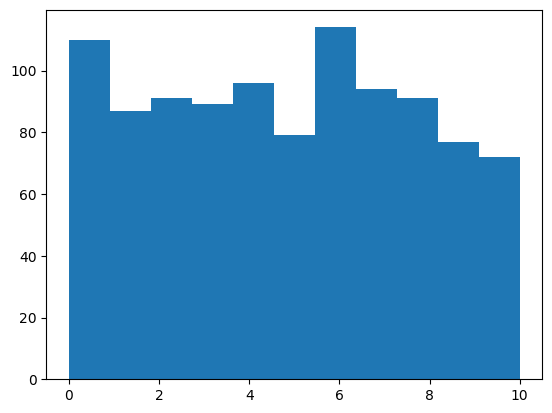

In [72]:
plt.hist(seq3, bins = 11) # распределение 
pirson = 0
for i in range(11):
    high = (0.0909 - seq3_freq[i]) ** 2
    low = seq3_freq[i]
    pirson += high / low
print(pirson, '- Критерий Пирсона для 10**3 наблюдений')

0.00028256953525289353 - Критерий Пирсона для 10**4 наблюдений


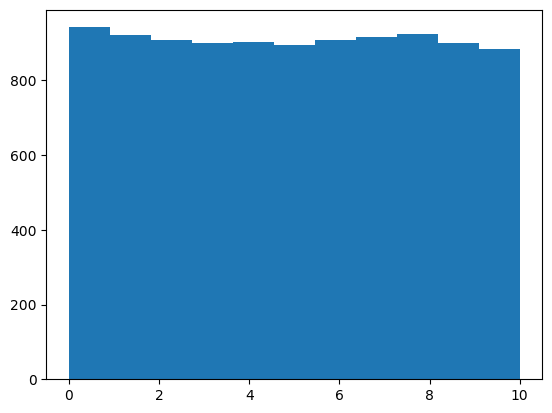

In [73]:
plt.hist(seq4, bins = 11) # распределение 
pirson = 0
for i in range(11):
    high = (0.0909 - seq4_freq[i]) ** 2
    low = seq4_freq[i]
    pirson += high / low
print(pirson, '- Критерий Пирсона для 10**4 наблюдений')

0.00010397814693134284 - Критерий Пирсона для 10**4 наблюдений


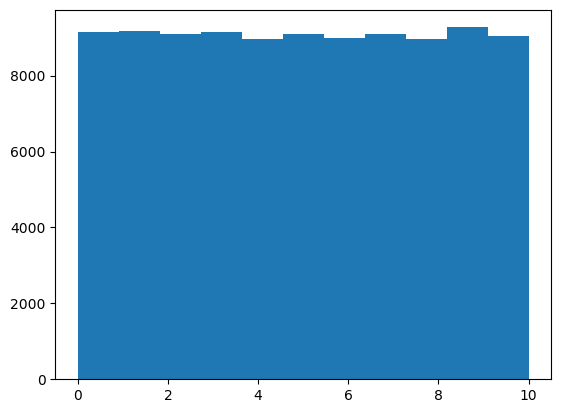

In [74]:
plt.hist(seq5, bins = 11) # распределение 
pirson = 0
for i in range(11):
    high = (0.0909 - seq5_freq[i]) ** 2
    low = seq5_freq[i]
    pirson += high / low
print(pirson, '- Критерий Пирсона для 10**4 наблюдений')